# Proyek Akhir: Menyelesaikan Permasalahan Jaya Jaya Institut

Jaya Jaya Institut merupakan salah satu institusi pendidikan perguruan yang telah berdiri sejak tahun 2000. Hingga saat ini ia telah mencetak banyak lulusan dengan reputasi yang sangat baik. Akan tetapi, terdapat banyak juga siswa yang tidak menyelesaikan pendidikannya alias dropout.

Jumlah dropout yang tinggi ini tentunya menjadi salah satu masalah yang besar untuk sebuah institusi pendidikan. Oleh karena itu, Jaya Jaya Institut ingin mendeteksi secepat mungkin siswa yang mungkin akan melakukan dropout sehingga dapat diberi bimbingan khusus.

Proyek ini dilakukan untuk menyelesaikan permasalahan Jaya Jaya Institut  dengan mengidentifikasi berbagai faktor yang mempengaruhi dropout.



- Nama: Nurul Nyi Qoniah
- Email:nurulqoniah313@gmail.com
- Id Dicoding: nurqoneah

## Persiapan


### Menyiapkan library yang dibutuhkan

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Menyiapkan data yang akan digunakan

Dataset yang diganakan pada proyek ini adalah dataset employee yang dapat diakses di [Dataset Student](https://github.com/dicodingacademy/dicoding_dataset/blob/main/students_performance/data.csv)

In [83]:
# Load the dataset from the URL
url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv"
df = pd.read_csv(url, delimiter=";")


df.head()


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

Untuk memahami data dari kolom-kolom pada dataset employee, berikut adalah deskripsi singkat dari masing-masing kolom

1. **Marital Status**: Status pernikahan siswa (Single, Married, dll.).
2. **Application Mode**: Metode aplikasi (online, offline, dll.).
3. **Application Order**: Urutan aplikasi (0-9).
4. **Course**: Kursus yang diambil.
5. **Daytime/Evening Attendance**: Waktu kehadiran (Daytime/Evening).
6. **Previous Qualification**: Kualifikasi sebelumnya (SMA, Diploma, dll.).
7. **Previous Qualification Grade**: Nilai dari kualifikasi sebelumnya (0-200).
8. **Nationality**: Kewarganegaraan siswa.
9. **Mother's Qualification**: Kualifikasi pendidikan ibu.
10. **Father's Qualification**: Kualifikasi pendidikan ayah.
11. **Mother's Occupation**: Pekerjaan ibu.
12. **Father's Occupation**: Pekerjaan ayah.
13. **Admission Grade**: Nilai penerimaan (0-200).
14. **Displaced**: Status pengungsi (Yes/No).
15. **Educational Special Needs**: Kebutuhan pendidikan khusus (Yes/No).
16. **Debtor**: Status hutang (Yes/No).
17. **Tuition Fees Up to Date**: Status pembayaran biaya kuliah (Yes/No).
18. **Gender**: Jenis kelamin (Male/Female).
19. **Scholarship Holder**: Status beasiswa (Yes/No).
20. **Age at Enrollment**: Usia pada saat pendaftaran.
21. **International**: Status mahasiswa internasional (Yes/No).
22. **Curricular Units 1st Sem (Credited)**: Unit kurikuler yang diberikan pada semester pertama.
23. **Curricular Units 1st Sem (Enrolled)**: Unit kurikuler yang didaftarkan.
24. **Curricular Units 1st Sem (Evaluations)**: Unit kurikuler yang dievaluasi.
25. **Curricular Units 1st Sem (Approved)**: Unit kurikuler yang disetujui.
26. **Curricular Units 1st Sem (Grade)**: Rata-rata nilai semester pertama.
27. **Curricular Units 1st Sem (Without Evaluations)**: Unit tanpa evaluasi.
28. **Curricular Units 2nd Sem (Credited)**: Unit kurikuler pada semester kedua.
29. **Curricular Units 2nd Sem (Enrolled)**: Unit pada semester kedua yang didaftarkan.
30. **Curricular Units 2nd Sem (Evaluations)**: Evaluasi pada semester kedua.
31. **Curricular Units 2nd Sem (Approved)**: Disetujui pada semester kedua.
32. **Curricular Units 2nd Sem (Grade)**: Rata-rata nilai semester kedua.
33. **Curricular Units 2nd Sem (Without Evaluations)**: Unit tanpa evaluasi semester kedua.
34. **Unemployment Rate**: Tingkat pengangguran.
35. **Inflation Rate**: Tingkat inflasi.
36. **GDP**: Produk Domestik Bruto.
37. **Status**: Status akhir siswa (Lulus, Tidak Lulus, dll.).

Pertama, mari kita lihat 5 baris pertama dari dataframe:

In [84]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Preparation / Preprocessing

Selanjutnya, mari kita periksa informasi umum tentang dataframe, seperti jumlah baris dan kolom, tipe data, dan jumlah nilai yang tidak kosong:

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Tidak tedapat missing value dalam data begitu juga dengan tipe data yang sudah tepat

### Encoding Categorical Variables

Variabel kategorikal dikonversi menjadi numerik  pada df

In [86]:
categorical_cols = [
    'Marital_status', 'Application_mode', 'Course', 'Daytime_evening_attendance',
    'Previous_qualification', 'Nacionality', 'Mothers_qualification',
    'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
    'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date',
    'Gender', 'Scholarship_holder', 'International', 'Status'
]

le = LabelEncoder()
for col in categorical_cols:
  df[col] = le.fit_transform(df[col])

df.head()


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,0,7,5,1,1,0,122.0,0,12,9,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,0,5,1,10,1,0,160.0,0,0,2,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,0,0,5,4,1,0,122.0,0,21,26,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,0,7,2,14,1,0,122.0,0,22,26,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,1,11,1,2,0,0,100.0,0,21,27,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


### Scaling Numerical Variables

Fitur baru dibuat dan variabel numerik dinormalisasi pada dataset agar model dapat dilatih dengan data yang seragam

In [87]:
numeric_cols = [
    'Application_order','Application_mode','Course','Mothers_qualification','Fathers_qualification', 'Previous_qualification_grade', 'Admission_grade',
    'Age_at_enrollment', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations'
]

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head()


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,0,0.210069,2.490896,-1.823744,1,0,-0.804841,0,0.075111,-0.584526,...,-0.282442,-2.838337,-2.042630,-1.471527,-1.963489,-0.199441,10.8,1.4,1.74,0
1,0,-0.167406,-0.554068,0.254153,1,0,2.076819,0,-1.254495,-1.218380,...,-0.282442,-0.105726,-0.522682,0.518904,0.659562,-0.199441,13.9,-0.3,0.79,2
2,0,-1.111094,2.490896,-1.131112,1,0,-0.804841,0,1.072315,0.954834,...,-0.282442,-0.105726,-2.042630,-1.471527,-1.963489,-0.199441,10.8,1.4,1.74,0
3,0,0.210069,0.207173,1.177663,1,0,-0.804841,0,1.183116,0.954834,...,-0.282442,-0.105726,0.490616,0.187165,0.416450,-0.199441,9.4,-0.8,-3.12,2
4,1,0.965018,-0.554068,-1.592866,0,0,-2.473171,0,1.072315,1.045384,...,-0.282442,-0.105726,-0.522682,0.518904,0.531608,-0.199441,13.9,-0.3,0.79,2


## Modeling

Kolom Status digunakan sebagai target, sedangkan kolom lainnya digunakan sebagai fitur. Data dibagi menjadi training set dan testing set dengan perbandingan 80:20.

In [88]:
X = df.drop('Status', axis=1)
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Logistic Regression

In [89]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {logreg_accuracy:.4f}")
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.7537
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       316
           1       0.47      0.23      0.31       151
           2       0.76      0.91      0.83       418

    accuracy                           0.75       885
   macro avg       0.68      0.65      0.65       885
weighted avg       0.73      0.75      0.73       885



### Random Forest

In [90]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7582
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.77      0.80       316
           1       0.48      0.28      0.36       151
           2       0.76      0.92      0.83       418

    accuracy                           0.76       885
   macro avg       0.69      0.66      0.66       885
weighted avg       0.74      0.76      0.74       885



### Support Vector Machine (SVM)

In [91]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.7525
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.73      0.79       316
           1       0.45      0.32      0.37       151
           2       0.76      0.92      0.83       418

    accuracy                           0.75       885
   macro avg       0.69      0.66      0.67       885
weighted avg       0.74      0.75      0.74       885



## Evaluation

Menggunakan metrik accuracy untuk mengukur performa model pada test set dan laporan klasifikasi untuk lebih memahami rincian prediksi. Untuk mengevaluasi stabilitas model menggunakan cross-validation dengan 5 fold untuk semua model.

In [92]:
# Menggunakan cross-validation untuk lebih akurat membandingkan performa antar model
models = {'Logistic Regression': logreg, 'Random Forest': random_forest, 'SVM': svm}
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=10)
    print(f"{model_name} Cross Validation Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

Logistic Regression Cross Validation Accuracy: 0.7683 (+/- 0.0186)
Random Forest Cross Validation Accuracy: 0.7728 (+/- 0.0144)
SVM Cross Validation Accuracy: 0.7699 (+/- 0.0171)


In [93]:
import joblib
joblib.dump(svm, 'svm_model.pkl')
print("SVM model saved as 'svm_model.pkl'")

SVM model saved as 'svm_model.pkl'


Dari hasil training dapat dilihat bahwa dengan model SVM mendapat Validation Accuracy tertinggi 0.7699

Confusion Matrix for Logistic Regression:
 [[250  18  48]
 [ 43  35  73]
 [ 14  22 382]]
Confusion Matrix for Random Forest:
 [[243  22  51]
 [ 37  43  71]
 [  9  24 385]]
Confusion Matrix for SVM:
 [[232  33  51]
 [ 31  48  72]
 [  7  25 386]]


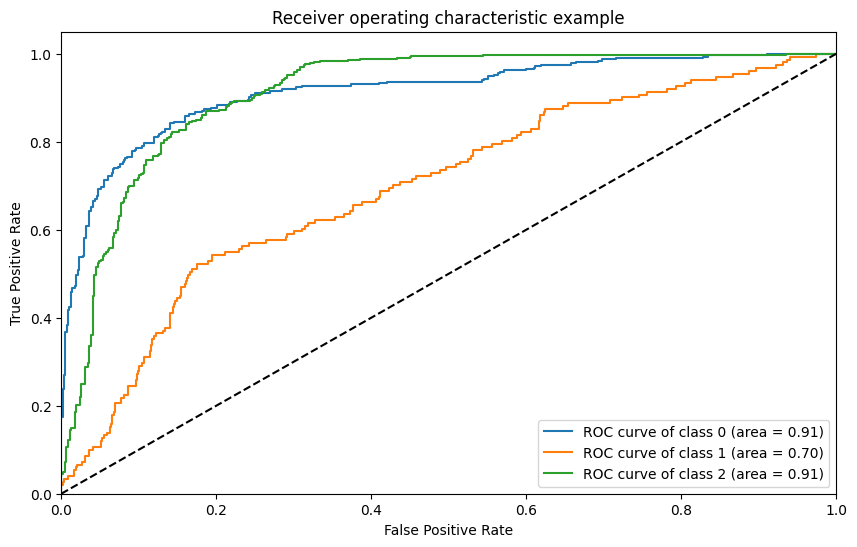

In [94]:
# Import library tambahan
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay # Import RocCurveDisplay
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


# Confusion Matrix untuk Logistic Regression
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix for Logistic Regression:\n", conf_matrix_logreg)

# Confusion Matrix untuk Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest:\n", conf_matrix_rf)

# Confusion Matrix untuk SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix for SVM:\n", conf_matrix_svm)

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# ROC Curve untuk ketiga model
plt.figure(figsize=(10, 6))

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    svm
)  # You can change svm to logreg or random_forest for their respective ROC curves
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_score[:, i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

Random Forest memiliki atribut feature_importances_ yang bisa kita gunakan untuk mengevaluasi seberapa penting setiap fitur dalam menentukan prediksi.

Feature Importance (Random Forest):
Curricular_units_2nd_sem_approved: 0.1311
Curricular_units_2nd_sem_grade: 0.1112
Curricular_units_1st_sem_approved: 0.0973
Curricular_units_1st_sem_grade: 0.0635
Curricular_units_2nd_sem_evaluations: 0.0437
Tuition_fees_up_to_date: 0.0432
Admission_grade: 0.0408
Previous_qualification_grade: 0.0381
Curricular_units_1st_sem_evaluations: 0.0374
Age_at_enrollment: 0.0356
Course: 0.0327
Fathers_occupation: 0.0282
Mothers_occupation: 0.0260
GDP: 0.0233
Unemployment_rate: 0.0229
Curricular_units_2nd_sem_enrolled: 0.0226
Fathers_qualification: 0.0216
Mothers_qualification: 0.0209
Application_mode: 0.0206
Inflation_rate: 0.0206
Curricular_units_1st_sem_enrolled: 0.0187
Scholarship_holder: 0.0181
Application_order: 0.0147
Debtor: 0.0110
Gender: 0.0093
Displaced: 0.0077
Curricular_units_1st_sem_credited: 0.0068
Previous_qualification: 0.0060
Curricular_units_2nd_sem_credited: 0.0055
Curricular_units_1st_sem_without_evaluations: 0.0052
Curricular_units_2nd_sem_

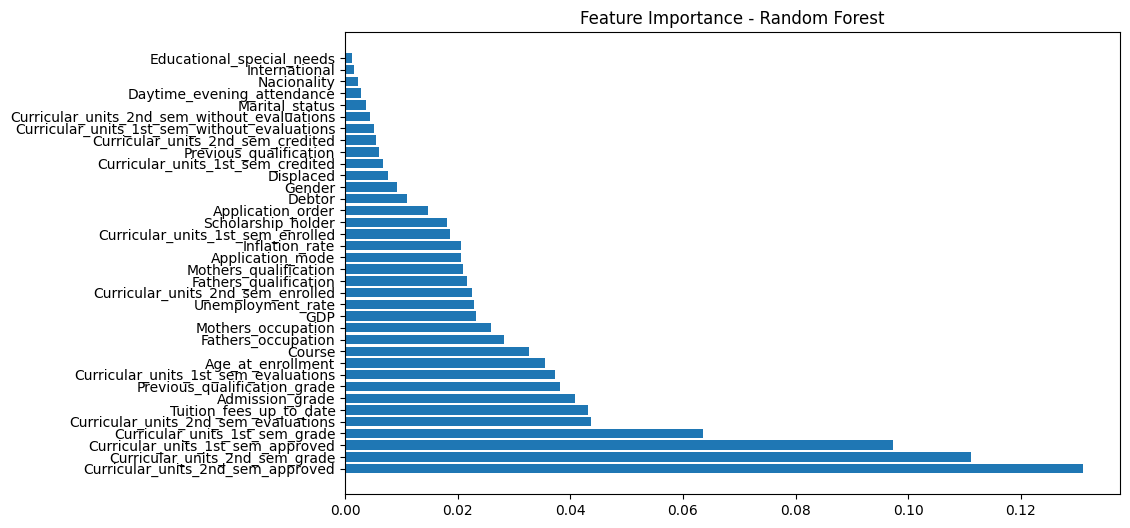

In [95]:
# Feature Importance dari Random Forest
importances = random_forest.feature_importances_
feature_names = X.columns

# Mengurutkan fitur berdasarkan tingkat kepentingannya
sorted_indices = np.argsort(importances)[::-1]

print("Feature Importance (Random Forest):")
for idx in sorted_indices:
    print(f"{feature_names[idx]}: {importances[idx]:.4f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_indices], importances[sorted_indices])
plt.title('Feature Importance - Random Forest')
plt.show()


Logistic Regression memiliki koefisien yang menunjukkan dampak setiap fitur terhadap probabilitas prediksi. Koefisien positif menunjukkan bahwa fitur tersebut meningkatkan peluang Attrition (bernilai "Yes"), sedangkan koefisien negatif menunjukkan sebaliknya.

Logistic Regression Coefficients:
Tuition_fees_up_to_date: -1.6151
Curricular_units_2nd_sem_approved: -1.4800
International: -1.0245
Curricular_units_1st_sem_approved: -0.9605
Curricular_units_2nd_sem_enrolled: 0.9215
Curricular_units_2nd_sem_grade: -0.4192
Debtor: 0.4126
Age_at_enrollment: 0.2970
Curricular_units_1st_sem_grade: 0.2851
Course: 0.2632
Curricular_units_1st_sem_credited: 0.2551
Curricular_units_2nd_sem_credited: 0.2480
Scholarship_holder: -0.2199
Curricular_units_1st_sem_enrolled: 0.1943
Displaced: 0.1886
Gender: 0.1698
Marital_status: -0.1342
Mothers_qualification: 0.1098
Curricular_units_2nd_sem_without_evaluations: -0.0930
Daytime_evening_attendance: 0.0746
Unemployment_rate: 0.0668
Nacionality: 0.0647
Application_order: 0.0640
Educational_special_needs: 0.0562
Curricular_units_2nd_sem_evaluations: -0.0495
Mothers_occupation: -0.0452
Previous_qualification_grade: 0.0364
Curricular_units_1st_sem_evaluations: -0.0338
Admission_grade: -0.0270
Fathers_qualification: -0.024

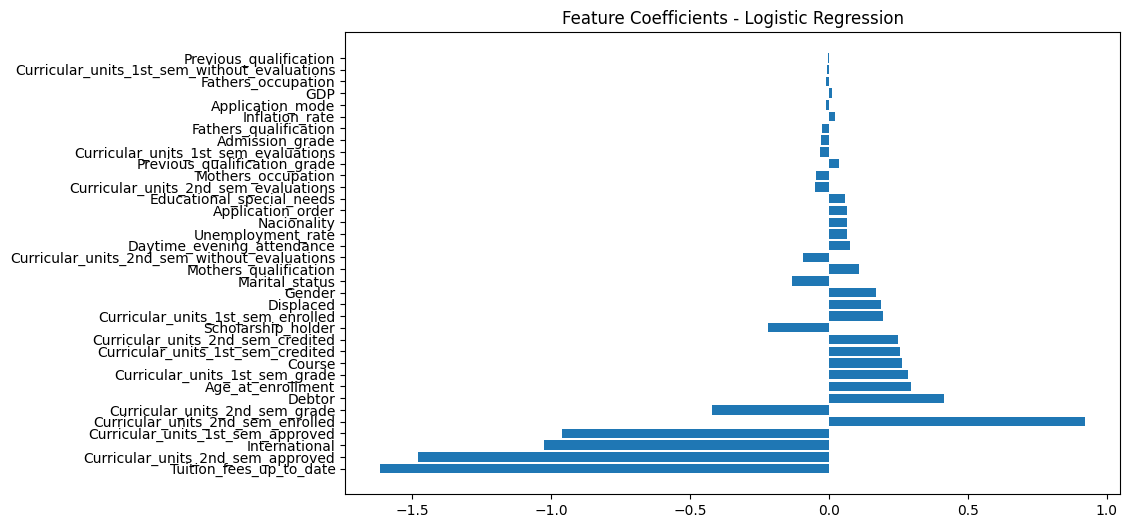

In [96]:
# Koefisien dari Logistic Regression
logreg_coef = logreg.coef_[0]
sorted_indices_logreg = np.argsort(abs(logreg_coef))[::-1]

print("Logistic Regression Coefficients:")
for idx in sorted_indices_logreg:
    print(f"{feature_names[idx]}: {logreg_coef[idx]:.4f}")

# Plotting Coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_indices_logreg], logreg_coef[sorted_indices_logreg])
plt.title('Feature Coefficients - Logistic Regression')
plt.show()


### Faktor-Faktor yang Biasanya Mempengaruhi Status Student
Berdasarkan pengalaman dari model seperti ini, beberapa faktor yang umumnya sangat berpengaruh terhadap status student adalah:


*   Tuition_fees_up_to_date
*   Curricular_units_2nd_sem_approved






## Deploy

mencoba menggunakan model untuk prediksi status

In [99]:
# Data yang akan diprediksi
new_data = "1;39;1;9119;1;10;133.1;1;34;37;0;0;128.8;1;0;0;1;1;0;43;0;0;5;0;0;0.0;0;0;5;0;0;0.0;0;7.6;2.6;0.32"

# Memisahkan nilai-nilai dalam string
new_data_list = new_data.split(';')

# Membuat DataFrame dari data baru
# Exclude the last column ('Status') as it's the target variable
new_df = pd.DataFrame([new_data_list], columns=df.columns[:-1])

# Encoding Categorical Variables
for col in categorical_cols:
    if col != 'Status':  # Exclude 'Status' from encoding
        try:
            new_df[col] = le.transform(new_df[col])
        except ValueError as e:
            # Handle unseen labels by assigning a default value
            print(f"Warning: Unseen label in column '{col}'. Assigning default value.")
            new_df[col] = 0  # Assign a default value (e.g., 0)

# Scaling Numerical Variables
new_df[numeric_cols] = scaler.transform(new_df[numeric_cols])

# Melakukan prediksi menggunakan model SVM
y_pred_new_data = svm.predict(new_df)

# Define the mapping of numerical labels to original categories
status_mapping = {
    0: "Dropout",
    1: "Enrolled",
    2: "Graduate"
}

# Map the predicted numerical label to its corresponding category
predicted_status = status_mapping[y_pred_new_data[0]]

print(f"Prediksi Status untuk data baru: {predicted_status}")

Prediksi Status untuk data baru: Dropout


Save model, label encoder dan standard scaler untuk digunakan di apk streamlit

In [100]:
# Save the trained model using joblib
joblib.dump(svm, 'svm_model.pkl')

# Save the label encoder and standard scaler
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(scaler, 'standard_scaler.pkl')

['standard_scaler.pkl']